In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('/home/kevin/Downloads/titanic.csv')

In [5]:
len(df.loc[df['Embarked'] == 'C'])/len(df)

0.18855218855218855

In [24]:
df['Sex'].isna().sum()

0

In [15]:
female_df = df.loc[df['Sex'] == 'female']

In [18]:
female_from_c = female_df[female_df['Embarked'] == 'C']

In [21]:
len(female_from_c)/len(female_df)

0.23248407643312102

In [26]:
female_df.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,73,73,73,73,73,61,73,73,73,73,37
Q,36,36,36,36,36,12,36,36,36,36,2
S,203,203,203,203,203,186,203,203,203,203,56


In [20]:
female_from_c['Survived'].value_counts()

1    64
0     9
Name: Survived, dtype: int64

 # Definitely drop

In [3]:
df = df.drop('PassengerId', axis=1)
df = df.loc[df['Embarked'].notna()]

 # Maybe drop


In [4]:
df = df.drop(['Name', 'Cabin', 'Ticket'], axis=1)

In [5]:
def prepare_drop(t_df):
    t_df = t_df.drop('PassengerId', axis=1)
    t_df = t_df.loc[t_df['Embarked'].notna()]
    t_df = t_df.drop(['Name', 'Cabin', 'Ticket'], axis=1)

    return t_df

In [6]:
embarked_encoding = df.groupby('Embarked')['Survived'].mean()

df['mean_embarked'] = df['Embarked'].apply(lambda x: embarked_encoding.loc[x])

embarked_class = {'Q': 0, 'S': 1, 'C': 2}

df['ordinal_embarked'] = df['Embarked'].apply(lambda x: embarked_class[x])

df = df.drop('Embarked', axis=1)

In [7]:
def prepare_embarked(t_df):
    t_df['mean_embarked'] = t_df['Embarked'].apply(lambda x: embarked_encoding.loc[x])
    t_df['ordinal_embarked'] = t_df['Embarked'].apply(lambda x: embarked_class[x])

    t_df = t_df.drop('Embarked', axis=1)
    return t_df

/home/kevin/.local/share/virtualenvs/ds1.1-qN7bVCXO/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


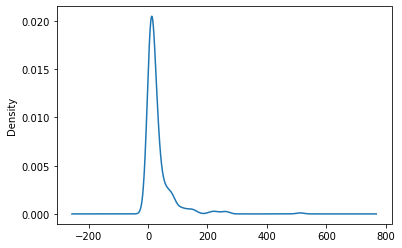

In [8]:
df['Fare'].plot('density')

In [9]:
num_fare_bins = 10
df['Fare'], fare_bins = pd.qcut(df['Fare'], num_fare_bins, labels=False, retbins=True)

In [10]:
def prepare_fare(t_df):
    t_df['Fare'] = pd.cut(t_df['Fare'], bins=fare_bins, labels=False, include_lowest=True)
    t_df.loc[t_df['Fare'].isna(), 'Fare'] = num_fare_bins + 1
    return t_df

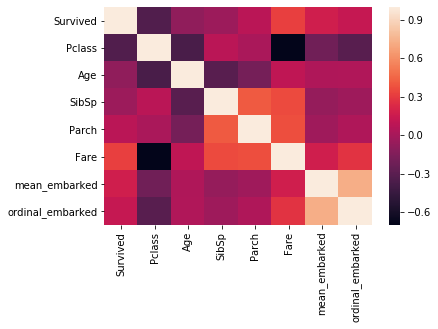

In [11]:
sns.heatmap(df.corr())

In [12]:
pclass_encoding = df.groupby('Pclass')['Survived'].mean()

In [13]:
df['Pclass'] = df['Pclass'].apply(lambda x: pclass_encoding.loc[x])

In [14]:
def prepare_pclass(t_df):
    t_df['Pclass'] = t_df['Pclass'].apply(lambda x: pclass_encoding.loc[x])
    return t_df

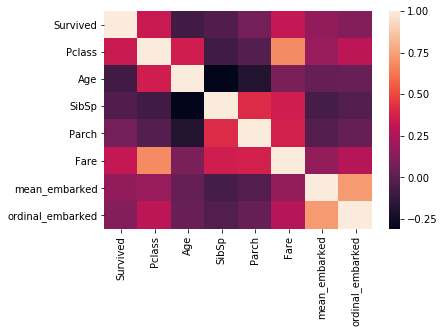

In [15]:
sns.heatmap(df.corr())

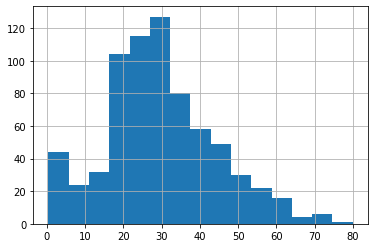

In [16]:
df['Age'].hist(bins=15)

In [17]:
df['binned_age'], age_bins = pd.qcut(df['Age'], 15, labels=False, retbins=True)
df.loc[df['binned_age'].isna(), 'binned_age'] = 15.0

mean_age = df.groupby('binned_age')['Survived'].mean().to_dict()
mean_nan = df.loc[df['binned_age'].isna(), 'Survived'].mean()

def get_mean_age(binned_age):
    if np.isnan(binned_age):
        return mean_nan
    
    return mean_age[binned_age]

df['mean_age'] = df['binned_age'].apply(lambda x: get_mean_age(x))
df = df.drop('binned_age', axis=1)
df = df.drop('Age', axis=1)

In [18]:
def prepare_age(t_df):
    t_df['binned_age'] = pd.cut(t_df['Age'], bins=age_bins, labels=False, include_lowest=True)
    t_df.loc[t_df['binned_age'].isna(), 'binned_age'] = 15.0
    t_df['mean_age'] = t_df['binned_age'].apply(lambda x: get_mean_age(x))
    
    t_df = t_df.drop('binned_age', axis=1)
    t_df = t_df.drop('Age', axis=1)

    return t_df

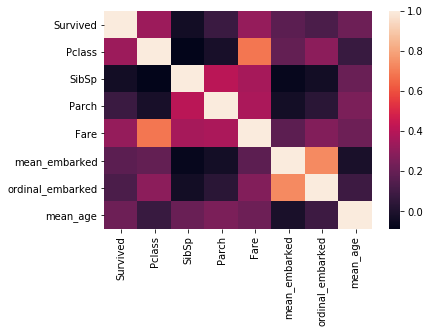

In [19]:
sns.heatmap(df.corr())

In [20]:
df['not_male'] = df['Sex'].apply(lambda x: int(x != 'male'))
df = df.drop('Sex', axis=1)

In [21]:
def prepare_sex(t_df):
    t_df['not_male'] = t_df['Sex'].apply(lambda x: int(x != 'male'))
    t_df = t_df.drop('Sex', axis=1)
    return t_df

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'])

In [23]:
rf = RandomForestClassifier()

In [24]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
test_df = pd.read_csv('/home/kevin/Downloads/test.csv')

In [26]:
t_df = test_df.copy()

In [27]:
preperations = [prepare_drop, prepare_embarked, prepare_pclass, prepare_age, prepare_fare, prepare_sex]

In [28]:
for preperation in preperations:
    t_df = preperation(t_df)

In [29]:
submission_df = pd.DataFrame()

In [30]:
submission_df['PassengerId'] = test_df['PassengerId']
submission_df['Survived'] = rf.predict(t_df)

In [36]:
submission_df.to_csv('/home/kevin/Downloads/submission.csv', index=False)

In [32]:
np.mean(rf.predict(X_test) == y_test)

0.8161434977578476

In [ ]:
model predicted live, and they live | model predicted live and htey die
model predict die, and they live | model predict die, they die